# Data Preparation

In [1]:
import numpy as np
import pandas as pd

In [3]:
dfx=pd.read_csv('Diabetes_XTrain.csv')
dfy=pd.read_csv('Diabetes_YTrain.csv')
print(dfx.shape)
print(dfy.shape)

(576, 8)
(576, 1)


In [8]:
X=dfx.values
Y=dfy.values
Y=Y.reshape((-1,))
print(X.shape,Y.shape)

(576, 8) (576,)


# Algorithm

In [86]:
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))
def KNN(X,Y,query_point,k=5):
    vals=[]
    m=X.shape[0]
    for i in range(m):
        d=distance(X[i],query_point)
        vals.append((d,Y[i]))
    vals=sorted(vals)
    vals=vals[:k]
    vals=np.array(vals)
    new_val=np.unique(vals[:,1],return_counts=True)
    index=new_val[1].argmax()
    predict=new_val[0][index]
    return predict

In [87]:
split=int(0.8*X.shape[0])
X_train=X[:split,:]
Y_train=Y[:split]
X_test=X[split:,:]
Y_test=Y[split:]


In [88]:
# splitting
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(460, 8) (460,)
(116, 8) (116,)


In [90]:
val=int(KNN(X_train,Y_train,X_test[8],k=5))
print(val)

0


# Lets Plot Bar Graph

In [48]:
import matplotlib.pyplot as plt

In [64]:
classes=np.unique(Y)
dict_classes={}
for i in range(len(classes)):
    dict_classes[classes[i]]=0

In [65]:
for i in range(X.shape[0]):
    dict_classes[Y[i]]+=1
print(dict_classes)

{0: 375, 1: 201}


In [66]:
values=dict_classes.values()

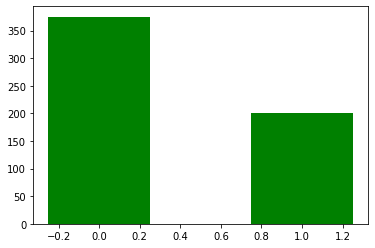

In [69]:
plt.bar(classes,values,width=0.5,color='green')
plt.show()

In [75]:
print(X_train[2][5])

39.4


# Testing!!!

In [94]:
df_test=pd.read_csv('Diabetes_Xtest.csv')
print(df_test.shape)
df_test=np.array(df_test)
print(type(df_test))

(192, 8)
<class 'numpy.ndarray'>


In [130]:
predictions=[]
for i in range(df_test.shape[0]):
    val=int(KNN(X_train,Y_train,df_test[i],k=19))
    predictions.append(val)
print(predictions)

[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]


In [131]:
predictions=np.array(predictions)
print(type(predictions))

<class 'numpy.ndarray'>


In [132]:
result_df=pd.DataFrame(predictions,columns=['Outcome'])
result_df.to_csv('result.csv',index=False)

In [ ]:
# k=11, highest 77%